# Einstiegsbeispiel

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Gegeben sind die drei Punkte:

$$\begin{array}{c|c}
x_i & y_i \\\hline
0 & 0\\
1 & -1\\
3 & 2\end{array}$$

In [2]:
xi = np.array([0,1,3])
yi = np.array([0,-1,2])

## Natürlichen Randbedingunge

Ansatz:

$$g(x) = \begin{cases}
g|_{[0,1)}(x) = a_0 + a_1\,(x-x_0) + a_2\,(x-x_0)^2 + a_3\,(x-x_0)^3\\
g|_{[1,3]}(x) = b_0 + b_1\,(x-x_0) + b_2\,(x-x_0)^2 + b_3\,(x-x_0)^3
\end{cases}$$

1. Interpolationsbedingung:

$$\begin{split}
g|_{[0,1)}(0) & = a_0 = 0\\
g|_{[1,3]}(1) & = b_0 = -1\\
g|_{[1,3]}(3) & = b_0 + 2\,b_1 + 4\,b_2 + 8\,b_3 = 2
\end{split}$$

2. Stetigkeit von $g(x)$:

$$g|_{[0,1)}(1) = a_0 + a_1 + a_2 + a_3 = g|_{[1,3]}(1) = b_0$$

3. Stetigkeit von $g'(x)$:

$$g'|_{[0,1)}(1) = a_1 + 2\, a_2 + 3\, a_3 = g'|_{[1,3]}(1) = b_1$$

4. Stetigkeit von $g''(x)$:

$$g''|_{[0,1)}(1) = 2\, a_2 + 6\, a_3 = g''|_{[1,3]}(1) = 2\,b_2$$




Natürliche Randbedingung:

$$\begin{split}
g''(0) &= g''|_{[0,1)}(0) = 2 a_2 = 0\\
g''(3) &= g''|_{[1,3]}(3) = 2 b_2 + 12 b_3 = 0
\end{split}$$

Es folgt ein lineares Gleichungssystem
$$A\cdot {\small\begin{pmatrix}\vec{a}\\ \vec{b}\end{pmatrix}} = f$$ 

In [3]:
A = np.array([
    [1,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0],
    [0,0,0,0,1,2,4,8],
    [1,1,1,1,-1,0,0,0],
    [0,1,2,3,0,-1,0,0],
    [0,0,2,6,0,0,-2,0],
    [0,0,2,0,0,0,0,0],
    [0,0,0,0,0,0,2,12]
])

In [4]:
f = np.array([0,-1,2,0,0,0,0,0])

Lösen des Systems z.B. mit LR-Zerlegung:

In [5]:
from scipy.linalg import lu, solve_triangular

In [6]:
# LR-Zerlegung berechnen
P,L,R = lu(A)
# Vorwärtseinsetzen
z = solve_triangular(L,P.T@f,lower=True)
# Rückwärtseinsetzen
ab = solve_triangular(R,z,lower=False)
ab

array([ 0.        , -1.41666667,  0.        ,  0.41666667, -1.        ,
       -0.16666667,  1.25      , -0.20833333])

Intervallweise Visualisierung

In [7]:
xp = np.linspace(0,3,400)
yp = np.zeros_like(xp)
# 1. Intervall
ind1 = (xp < xi[1])
for k in range(4):
    yp[ind1] += ab[k]*(xp[ind1]-xi[0])**k
# 2. Intervall
ind2 = (xi[1] <= xp)
for k in range(4):
    yp[ind2] += ab[4+k]*(xp[ind2]-xi[1])**k

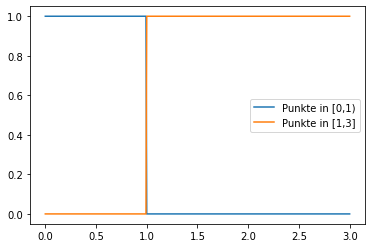

In [8]:
plt.plot(xp,ind1,label='Punkte in [0,1)')
plt.plot(xp,ind2,label='Punkte in [1,3]')
plt.legend()
plt.show()

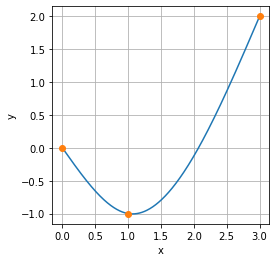

In [9]:
plt.plot(xp,yp)
plt.plot(xi,yi,'o')
plt.grid()
plt.gca().set_aspect(1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()